In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Project_name=[]
Apartment=[]
Area_in_sqft=[]
Area=[]
Total_Price=[]
Price_per_sqft=[]
Status_of_construction=[]
Possession_date=[]
Builder=[]
p1=[]

for x in range(1,22):
    URL="https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?propertyType=apartment&_=1664189703836&page="+str(x)
    response=requests.get(URL)
    soup=BeautifulSoup(response.text)
    for i in soup.find_all("div",attrs={"class","title-line"}):
        i=i.get_text()
        a=i.split()[4:]
        b=" ".join(a)
        Project_name.append(b)
    for i in soup.find_all("div",attrs={"class","title-line"}):
        i=i.get_text()
        a=i.split()[0:2]
        b=" ".join(a)
        Apartment.append(b)
    for i in soup.find_all("td",attrs={"class","size"}):
        i=i.get_text()
        Area_in_sqft.append(i)
    for i in soup.find_all("span",attrs={"itemprop":"addressLocality"}):
        i=i.get_text()
        a=i.split()[0:2]
        b=" ".join(a)
        Area.append(b)
    for i in soup.find_all("td",attrs={"class","price"}):
        i=i.get_text()
        a=i.split()[0:2]
        b=" ".join(a)
        Total_Price.append(b)
    for i in soup.find_all("td",attrs={"class","lbl rate"}):
        i=i.get_text()
        a=i.split()[0:1]
        b=' '.join(a)
        b=b.replace(',','')
        Price_per_sqft.append(b)
    for i in soup.find_all("td",attrs={"class":"val"}):
        i=i.get_text()
        Status_of_construction.append(i)
    for i in soup.find_all("div",attrs={"class":"seller-info"}):
        i=i.get_text()
        Builder.append(i)
    for i in soup.find_all("ul",attrs={"class",'listing-details'}):
        p1.append(i)
for i in range(0,len(p1)):
    if p1[i].find('li',attrs={"title":["Possession by",'old']})==None:
        Possession_date.append(np.NaN)
    else:
        a=p1[i].find('li',attrs={"title":["Possession by",'old']})
        Possession_date.append(a.get_text())


In [3]:
data=pd.DataFrame({"PROJECT":Project_name,'BUILDER':Builder,'APARTMENT':Apartment,'AREA':Area_in_sqft,'PRICE PER SQFT':Price_per_sqft,'TOTAL COST':Total_Price,"LOCATION":Area,'STATUS':Status_of_construction,'POSSESSION':Possession_date})

In [13]:
Data=pd.read_csv("C:\\Users\\SARANYA\\Desktop\\Innomatics\\assignments\\Untitled Folder\\project.csv")

In [14]:
Data

,PROJECT,BUILDER,APARTMENT,AREA,PRICE PER SQFT,TOTAL COST,LOCATION,STATUS,POSSESSION
0,Namishree BPS Twin Towers,Namishree Infrastructure And Project Pvt Ltd,3 BHK,1800,5800,1.04 Cr,Saidabad,Under Construction,Nov 2023
1,GHR Callisto,GHR Infra,3 BHK,1775,4999,88.73 L,Kollur,Under Construction,Nov 2025
2,Provident Kenworth,Provident Housing Limited,3 BHK,1047,7641,80 L,Rajendra Nagar,Ready to move,1 - 2 years old
3,IRA M3,Ira Reality,2 BHK,1105,4999,55.23 L,Kollur,Under Construction,Jun 2023
4,Merlion Galaxia,Merlion Builders,3 BHK,1551,5600,86.81 L,Nizampet,Under Construction,Nov 2023
...,...,...,...,...,...,...,...,...,...
415,NaN,sellerVERIFIED OWNER,3 BHK,1470,6258,92 L,Kondapur,Ready to move,NaN
416,Bhuvanteza Aura II,sellerVERIFIED OWNER,2 BHK,1200,3000,36 L,Kollur,Under Construction,Dec 2024
417,NaN,sellerVERIFIED OWNER,2 BHK,1223,4554,55.7 L,Nacharam,Under Construction,NaN
418,Sita Pramod Elite,sellerVERIFIED OWNER,3 BHK,1620,6234,1.01 Cr,Attapur,Ready to move,NaN


In [15]:
Data.columns

Index(['PROJECT', 'BUILDER', 'APARTMENT', 'AREA', 'PRICE PER SQFT',
       'TOTAL COST', 'LOCATION', 'STATUS', 'POSSESSION'],
      dtype='object')

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PROJECT         392 non-null    object
 1   BUILDER         420 non-null    object
 2   APARTMENT       420 non-null    object
 3   AREA            420 non-null    int64 
 4   PRICE PER SQFT  420 non-null    int64 
 5   TOTAL COST      420 non-null    object
 6   LOCATION        420 non-null    object
 7   STATUS          420 non-null    object
 8   POSSESSION      385 non-null    object
dtypes: int64(2), object(7)
memory usage: 29.7+ KB


C:\Users\SARANYA\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\SARANYA\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


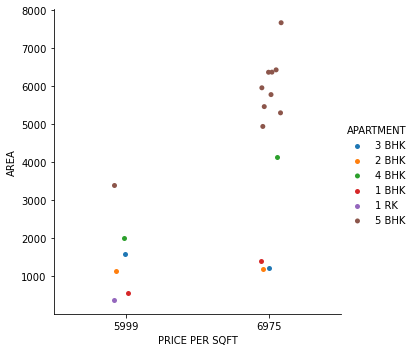

In [18]:
m=sns.FacetGrid(data=Data,hue='APARTMENT',size=5)
m.map(sns.stripplot,'PRICE PER SQFT',"AREA")
m.add_legend()

In [19]:
x=Data.groupby("APARTMENT")
x

In [20]:
x.get_group("3 BHK")

,PROJECT,BUILDER,APARTMENT,AREA,PRICE PER SQFT,TOTAL COST,LOCATION,STATUS,POSSESSION
0,Namishree BPS Twin Towers,Namishree Infrastructure And Project Pvt Ltd,3 BHK,1800,5800,1.04 Cr,Saidabad,Under Construction,Nov 2023
1,GHR Callisto,GHR Infra,3 BHK,1775,4999,88.73 L,Kollur,Under Construction,Nov 2025
2,Provident Kenworth,Provident Housing Limited,3 BHK,1047,7641,80 L,Rajendra Nagar,Ready to move,1 - 2 years old
4,Merlion Galaxia,Merlion Builders,3 BHK,1551,5600,86.81 L,Nizampet,Under Construction,Nov 2023
5,Hivision Heights,Hivision Developer,3 BHK,1901,5999,1.14 Cr,Kompally,Under Construction,Feb 2024
...,...,...,...,...,...,...,...,...,...
408,Splendeur Shweta Shubham,sellerVERIFIED OWNER,3 BHK,1726,5880,1.01 Cr,Kompally,Ready to move,0 - 1 year old
411,NaN,sellerVERIFIED OWNER,3 BHK,1400,5500,77 L,Alwal,Under Construction,NaN
413,Accurate Wind Chimes,sellerVERIFIED OWNER,3 BHK,1600,8437,1.35 Cr,Narsingi,Ready to move,NaN
415,NaN,sellerVERIFIED OWNER,3 BHK,1470,6258,92 L,Kondapur,Ready to move,NaN


In [21]:
x.get_group("2 BHK")

,PROJECT,BUILDER,APARTMENT,AREA,PRICE PER SQFT,TOTAL COST,LOCATION,STATUS,POSSESSION
3,IRA M3,Ira Reality,2 BHK,1105,4999,55.23 L,Kollur,Under Construction,Jun 2023
7,Vaishnavi Houdini,Vaishnavi Infracon India Pvt Ltd,2 BHK,1476,5600,82.65 L,Bandlaguda Jagir,Under Construction,Nov 2024
9,My Home Sayuk,My Home Constructions Pvt Ltd,2 BHK,1355,8856,1.2 Cr,Tellapur,Under Construction,Nov 2025
18,Vasavi Metropolis,Vasavi Group,2 BHK,1065,5705,60.7 L,Uppal Kalan,Under Construction,Apr 2027
19,Aavasa Constructions Emerald,Aavasa Constructions,2 BHK,1310,6500,85.15 L,Saroor Nagar,Under Construction,Nov 2023
...,...,...,...,...,...,...,...,...,...
412,NaN,sellerVERIFIED OWNER,2 BHK,1200,5416,65 L,Kompally,Under Construction,NaN
414,Indis PBEL City,sellerVERIFIED OWNER,2 BHK,1269,7092,90 L,Appa Junction,Ready to move,7 years old
416,Bhuvanteza Aura II,sellerVERIFIED OWNER,2 BHK,1200,3000,36 L,Kollur,Under Construction,Dec 2024
417,NaN,sellerVERIFIED OWNER,2 BHK,1223,4554,55.7 L,Nacharam,Under Construction,NaN


In [22]:
y=Data.groupby("LOCATION")


In [23]:
y.get_group("Kompally")

,PROJECT,BUILDER,APARTMENT,AREA,PRICE PER SQFT,TOTAL COST,LOCATION,STATUS,POSSESSION
5,Hivision Heights,Hivision Developer,3 BHK,1901,5999,1.14 Cr,Kompally,Under Construction,Feb 2024
20,Primark De Stature,Primark Developers,3 BHK,2085,4699,97.97 L,Kompally,Under Construction,Nov 2022
25,Primark De Stature,Primark Projects Pvt Ltd,3 BHK,2085,4699,97.97 L,Kompally,Under Construction,Nov 2022
26,Srinivasa Emerald Greens,Sunder Homes Hyderabad,3 BHK,3810,5500,2.09 Cr,Kompally,Under Construction,Mar 2024
31,Beams 4 Blocks,Beams And Columns Builders Private Limited,2 BHK,1310,5299,69.41 L,Kompally,Under Construction,Feb 2023
37,Hivision Heights,Hivision Developer,4 BHK,2253,5999,1.35 Cr,Kompally,Under Construction,Feb 2024
52,Primark De Stature,Primark Developers,3 BHK,1515,4699,71.18 L,Kompally,Under Construction,Nov 2022
57,Primark De Stature,Primark Projects Pvt Ltd,3 BHK,1515,4699,71.18 L,Kompally,Under Construction,Nov 2022
58,Srinivasa Emerald Greens,Sunder Homes Hyderabad,3 BHK,2160,5500,1.18 Cr,Kompally,Under Construction,Mar 2024
63,Beams 4 Blocks,Beams And Columns Builders Private Limited,2 BHK,1245,5299,65.97 L,Kompally,Under Construction,Feb 2023


In [24]:
y.get_group("Kukatpally")

,PROJECT,BUILDER,APARTMENT,AREA,PRICE PER SQFT,TOTAL COST,LOCATION,STATUS,POSSESSION
22,Cybercity Oriana,Cyber City Oriana,3 BHK,2220,9909,2.2 Cr,Kukatpally,Under Construction,Nov 2025
54,Cybercity Oriana,Cyber City Oriana,2 BHK,1450,9310,1.35 Cr,Kukatpally,Under Construction,Nov 2025
86,Cybercity Oriana,Cyber City Oriana,3 BHK,1550,10322,1.6 Cr,Kukatpally,Under Construction,Nov 2025
302,Cybercity Oriana,Cyber City Oriana,2 BHK,1160,10344,1.2 Cr,Kukatpally,Under Construction,Nov 2025
369,Reputed Builder Indira Nivas,sellerVERIFIED OWNER,3 BHK,1500,4333,65 L,Kukatpally,Ready to move,NaN


In [25]:
y.get_group("Tellapur")

,PROJECT,BUILDER,APARTMENT,AREA,PRICE PER SQFT,TOTAL COST,LOCATION,STATUS,POSSESSION
9,My Home Sayuk,My Home Constructions Pvt Ltd,2 BHK,1355,8856,1.2 Cr,Tellapur,Under Construction,Nov 2025
41,My Home Sayuk,My Home Constructions Pvt Ltd,3 BHK,1926,7788,1.5 Cr,Tellapur,Under Construction,Nov 2025
73,My Home Sayuk,My Home Constructions Pvt Ltd,2 BHK,1573,8264,1.3 Cr,Tellapur,Under Construction,Nov 2025
96,Aliens Space Station,M KartheekAGENT0,3 BHK,2150,6975,1.49 Cr,Tellapur,Ready to move,0 - 1 year old
176,My Home Sayuk,My Home Constructions Pvt Ltd,3 BHK,2262,7515,1.7 Cr,Tellapur,Under Construction,Nov 2025
287,Aliens Space Station,M KartheekAGENT0,5 BHK,4945,6975,3.44 Cr,Tellapur,Ready to move,0 - 1 year old
288,Aliens Space Station,M KartheekAGENT0,5 BHK,5467,6975,3.81 Cr,Tellapur,Ready to move,0 - 1 year old
289,Aliens Space Station,M KartheekAGENT0,5 BHK,5962,6975,4.15 Cr,Tellapur,Ready to move,0 - 1 year old
290,Aliens Space Station,M KartheekAGENT0,3 BHK,1687,6975,1.17 Cr,Tellapur,Ready to move,0 - 1 year old
291,Aliens Space Station,M KartheekAGENT0,5 BHK,5783,6975,4.03 Cr,Tellapur,Ready to move,0 - 1 year old
